# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
here are some questions I will try to find an answer for at the exploration part:
#### How did the number of movies change over year?
#### How did the runtime of movie affect the popularity?
#### what is the maximum and minimum runtime movie?
#### what is the maximum and minimum profit of movie?
#### How did profit change over years?
#### Is there a relationship between budget of  movie and its revenue over years?
#### Is there a relationship between the popularity of movie and its profit in average over years?
#### Is there a relationship between the popularity of  movie and its runtime in average over years?




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [3]:
 # Perform operations to inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Note**: 
>  #### number of columns : 21 columns.
>  #### number of rows:  10866  rows.
>  #### We can notice that each of :
>  **cast, homepage, director, tagline, keywords, overwrite, genres, production companies has NAN values, so we have to take that in consediration while cleaning data**

In [5]:
# print data columns names andthe shape of the dataframe
print('The columns of my dataframe are :\n {}\n\n The shape of the original dataframe is:{} '.format(df.columns, df.shape))

The columns of my dataframe are :
 Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

 The shape of the original dataframe is:(10866, 21) 


**Note**: 
#### we can notice there are some columns are not siginficant for our data analysis ,so we would take this consideration while data cleaninig such as:  'id','imdb_id','homepage','tagline','keywords','overview',and release_date'


## Data Cleaning
>   ### First:
     Drop unused columums for my analysis such as 
    'id','imdb_id','homepage','tagline','keywords','overview',
     'budget_adj',and 'revenue_adj'
     

In [6]:
# function drop()to drop certain columns
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj'],axis=1, inplace=True)

In [7]:
# print the shape of the dataframe after dropping the above columns
print(' The shape of the dataframe after dropping the above columns is:{} '.format (df.shape))

 The shape of the dataframe after dropping the above columns is:(10866, 13) 


>   ### Second:
    Dealing with NAN values

In [8]:
#show NAN values for each column:
##df.isna().sum().any(), df.shape
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### We notice that each of cast, director , genres, and production_companies has NAN values..
#### Using fillna() function to fill all rows which contain NAN values with zeros..
#### I didn't drop them as there are lots of rows contains NAN and that would affect the statistics when I come to the exploration part..

In [9]:
# fill all NAN with Zeros
df=df.fillna(0)
# Check if there any other NAN Values
print('Is There any NAN values??  ', df.isna().sum().any())


Is There any NAN values??   False


>   ### Third:
     Dealing with zeros values for Budget and Revenue columns 

In [10]:
'number of rows which contains zeros in budget = {} \
, And  number of rows which contains zeros in budget = {} '\
.format(df[df['budget']==0].shape[0],df[df['revenue']==0].shape[0])

'number of rows which contains zeros in budget = 5696 , And  number of rows which contains zeros in budget = 6016 '

>   ### Fourth:
     Dealing with unapproperiate data type for date:

In [1]:
# view the data type of release_date:
df.release_date.dtype


NameError: name 'df' is not defined

**Notice**:  as we can see that the datatype for release_date is Object.
so we have to convert it to suitable data type

In [12]:
#using to_datatime( function to cenvert datatype of release_data to datetime..
df['release_date']=pd.to_datetime(df['release_date'])
print('the new data type for (released_date) is: {}\n \n ==> Sample of how it looks: \n {}'\
      .format(df['release_date'].dtype,df['release_date'].head(1)))

the new data type for (released_date) is: datetime64[ns]
 
 ==> Sample of how it looks: 
 0   2015-06-09
Name: release_date, dtype: datetime64[ns]


> ### Fifth:
    check for duplicates

In [14]:
#print the duplicated row
df[df.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010


**Notice**: 
#### there is one duplicated row , so we will drop it 

In [15]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [16]:
# check if there are any duplicates
sum(df.duplicated())

0

In [17]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


#### Note: we notice from the minimum value for (runtime, budget and revenue ) is Zero 
  ####  that would  be misleading while exploring data ..so we have to take that in consideration

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.2+ MB


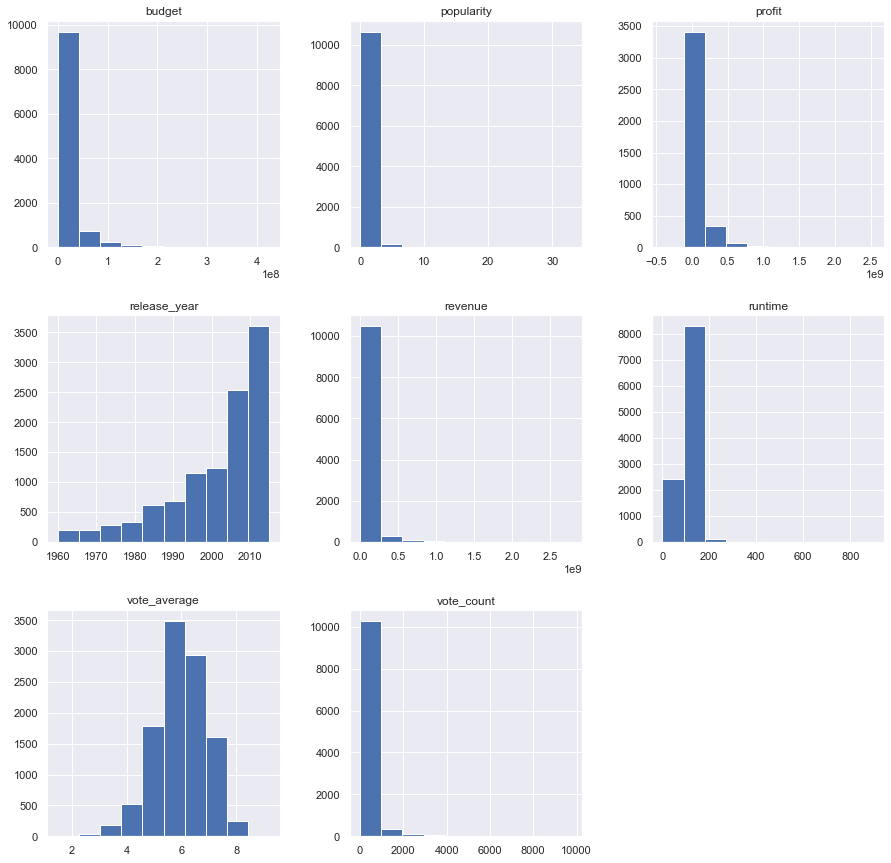

In [41]:

#visualize each columns in our dataframe
#Use ax.get_subplotspec().rowspan.start instead.
  #layout[ax.rowNum, ax.colNum] = ax.get_visible()
df.hist(figsize=(15,15));

##### We can notice from histogram for our dataframe columns that:
    The data of 'Budget,popularity' , 'Revenie', and 'vote_count' are more skewed to the left.
    The data of 'Runtime' and 'year_released' skewed to the right.
    The data of 'Vote Average' more like as normal distribution
    
##### Also we find:
    Most of budget values are between (0 and 1)1e8
    Most of Revenue values are between (0 and 0.4)1e8
    Most of Popularity values are between( 0 and 4)
    Most of Vote_count values are between (0 and 1000)
    Most of Vote_average values are between (5 and 7)
    Most of data (around 6000 entries ) are at the period ( from 2000 to 2015)
    

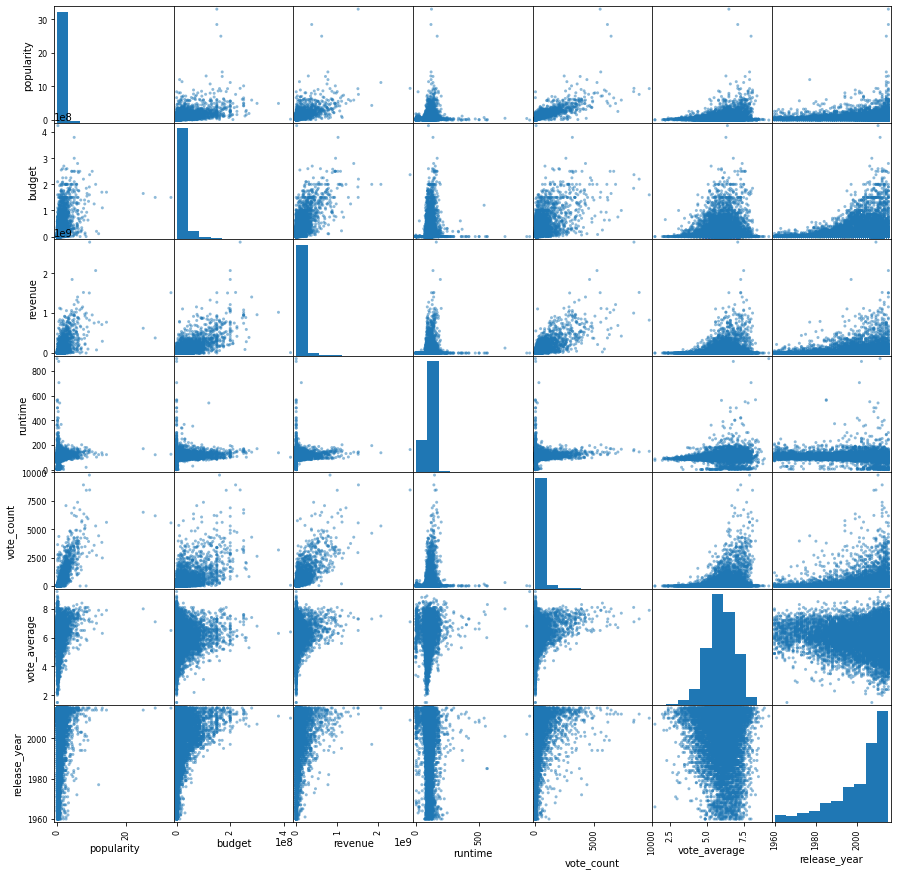

In [20]:
#visualize relationship between columns in our dataframe
pd.plotting.scatter_matrix(df, figsize=(15,15));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What is the maximum and the minimum year of released movie ? )

In [21]:
''' First: count the number of for each year.
    second : find the maximum numbers of movie and return its year.
    Third: find the minimum numbers of movie and return its year.
'''   
df.groupby('release_year')['original_title'].count()
max_NumOf_Movies=df.groupby('release_year')['original_title'].count().max()
min_NumOf_Movies=df.groupby('release_year')['original_title'].count().min()
max_year=df.groupby('release_year')['original_title'].count().idxmax()
min_year=df.groupby('release_year')['original_title'].count().idxmin()
print('Max_numbers of movies is ({}) and it was at year: ({})'.format(max_NumOf_Movies,max_year))
print('Min_numbers of movies is ({}) and it was at year: ({})'.format(min_NumOf_Movies,min_year))



Max_numbers of movies is (700) and it was at year: (2014)
Min_numbers of movies is (31) and it was at year: (1961)


### Research Question 2 (How the count of movies differs over time ? )

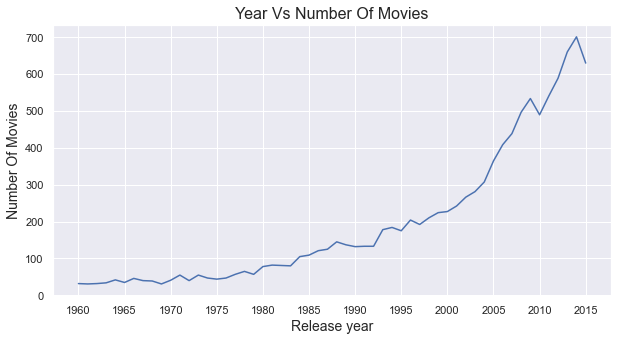

In [35]:
df.groupby('release_year')['original_title'].count().plot(xticks=np.arange(1960,2016,5));
#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)});
plt.title("Year Vs Number Of Movies",fontsize = 16);
plt.xlabel('Release year',fontsize = 14);
plt.ylabel('Number Of Movies',fontsize = 14);

#### Note: Number of movies during a year is increasing over years

## Research Question 3 (what is the movie with the shortest runtime and the longest runtime?)

### Create function(MinMax() to return the maximum value and the minimum value for a certain columns in dataframe

## Research Question 4 : Is the average runtime of movies over years increasing or decreasing?
                             

The movie with the highest runtime ( 900 ) is :( The Story of Film: An Odyssey ) 
The movie with the lowest runtime ( 2.0 ) is :( Fresh Guacamole ) 



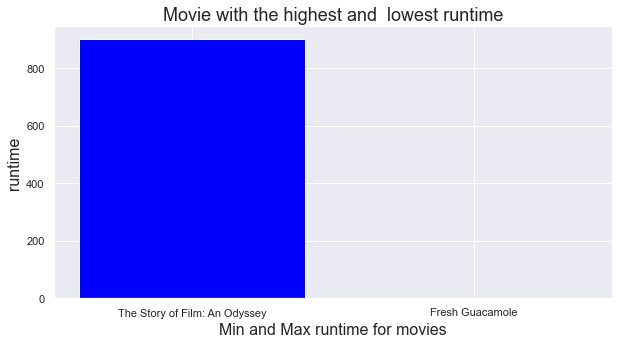

In [56]:
def MinMax(column):
    #find maximum value 
    max_value=df[column].max()
    
     #Return the row with the maximum value
    df_max=df[df.index==df[column].idxmax()]
    
    #movie with highest value
    movie_max=df_max['original_title'].to_string(index=False)
    #print the movie with the highest value
    
    print('The movie with the highest '+ column+ ' ( {} ) is :( {} ) '\
          .format(max_value,movie_max))
    
    '''Replace all zeros with NAN 
        Before we find the lowest value ,we have to be sure that the value isn't ZERO 
    '''
    without_zeros=df[column].replace(0,np.NAN)

    # check for the minimum value in runtime column
    min_value=without_zeros.min()

    #Return the row with the minimum runtime movie
    df_min=df[df.index==without_zeros.idxmin()]

    #movie with highest value
    movie_min=df_min['original_title'].to_string(index=False)
    
    #print the movie with the lowest runtime
    print('The movie with the lowest '+ column+ ' ( {} ) is :( {} ) '\
      .format(min_value,movie_min))
    print()
    
    #visualization
   
    plt.bar([1,2],[max_value,min_value],tick_label=[movie_max,movie_min],color=['blue','red']);
    sns.set(rc={'figure.figsize':(10,5)});
    plt.title('Movie with the highest and  lowest '+ column ,fontsize = 18);
    plt.xlabel('Min and Max ' + column + ' for movies',fontsize = 16);
    plt.ylabel(column,fontsize = 16);
    

MinMax('runtime')

In [ ]:
df=pd.DataFrame({'A':np.random.rand(2)-1,'B':np.random.rand(2)},index=['val1','val2'] )
ax = df.plot(kind='bar', color=['r','b']) 
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

## Research Question 5: what is the year with the lowest and highest runtime average?

### Creating Function (avg_MinMax(column)) to return the average of values over years

The maximum average runtime of movies is ( 124.34375 ) was at the year ( 1962 ) 
The minmum average runtime of movies is ( 96.04400606980273 ) was at the year ( 2013 ) 

           -->>The plot below show the average of runtime over years<<--


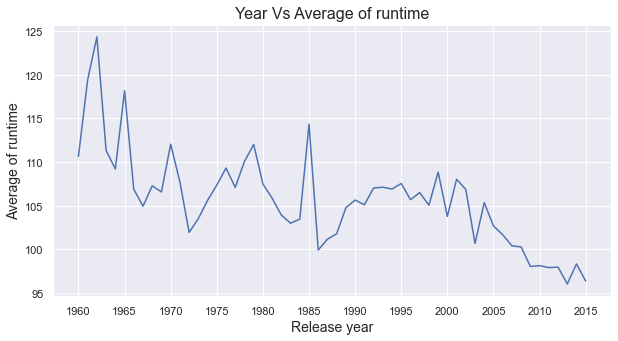

In [37]:
def avg_MinMax(column):
    #find the maximum of average runtime
    avg_max=df.groupby('release_year')[column].mean().max()

    #find the year with the maximum average runtime
    yearOf_avg_max=df.groupby('release_year')[column].mean().idxmax()

    #print the year with the max average runtime
    print('The maximum average '+ column +' of movies is ( {} ) was at the year ( {} ) '\
      .format(avg_max,yearOf_avg_max))
    
    #find the minimum of average runtime
    avg_min=df.groupby('release_year')[column].mean().min()

    #find the year with the minimum average runtime
    yearOf_avg_min=df.groupby('release_year')[column].mean().idxmin()

    #print the year with the min average runtime
    print('The minmum average '+column+ ' of movies is ( {} ) was at the year ( {} ) '.format(avg_min,yearOf_avg_min))
    
    #visualiziation
    
    print('\n           -->>The plot below show the average of '+ column + ' over years<<--')
    df.groupby('release_year')[column].mean().plot(xticks=np.arange(1960,2016,5));
    #set the figure size and labels
    sns.set(rc={'figure.figsize':(10,5)});
    plt.title('Year Vs Average of '+ column ,fontsize = 16);
    plt.xlabel('Release year',fontsize = 14);
    plt.ylabel('Average of '+ column,fontsize = 14);
avg_MinMax('runtime')

###  Note: The average of runtime of movie decreasing over years

## Research Question 6 (What is the maximum profit and the minimum profit ? )

The movie with the highest profit ( 2544505847.0 ) is :( Avatar ) 
The movie with the lowest profit ( -413912431.0 ) is :( The Warrior's Way ) 



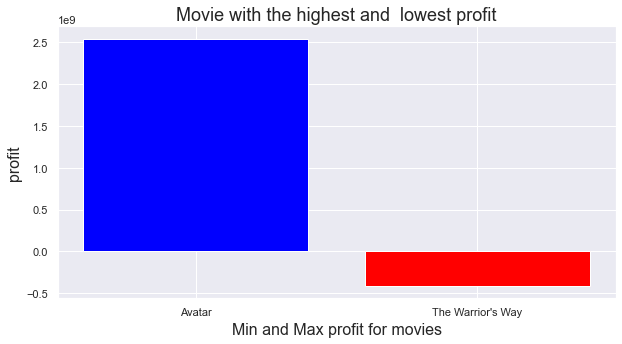

In [38]:
#convert all zeros to NAN to exclude them from calculations
budget=df['budget'].replace(0,np.NAN)
revenue=df['revenue'].replace(0,np.NAN)
#create new column profit (suvtract (revenue and budget))
df['profit']=revenue-budget
#calling the function to calculate the maximum and the minimum profit
MinMax('profit')


## Research Question 7 (What is the year with the highest and lowest profit  in average? )

The maximum average profit of movies is ( 118950907.95625 ) was at the year ( 2015 ) 
The minmum average profit of movies is ( 10493737.8 ) was at the year ( 1966 ) 

           -->>The plot below show the average of profit over years<<--


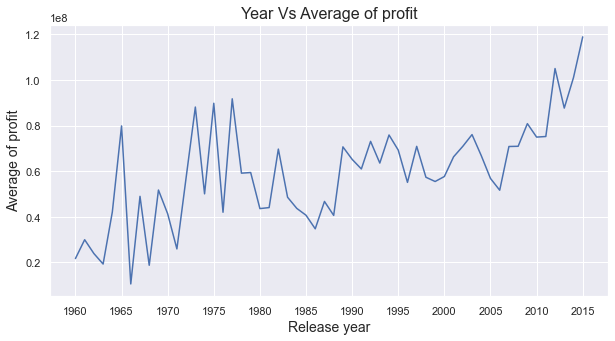

In [39]:
avg_MinMax('profit')

#### Note: Over all The average of profit of movie increasing over 
#### But we can notice that there is changes ups and downs in profit as it increased to 0.8(1e8) in 1965 and then decreased to less than 0.2(1e8) in the next year (1966)..
#### There is more fluctuation in profit over years in the period (from 1960 to 1990).. 


## Research Question 8 (What is the type of correlation between revenue and budget? )

Correlation Between Revenue And Budget =  0.6885561524636783

           -->>The plot below show the correlation between Revenue and Budget<<--


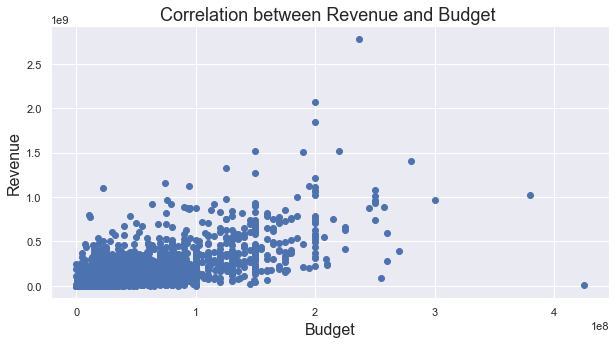

In [44]:
#convert all zeros to NAN to exclude them from calculations

df['budget'] = df['budget'].replace(0,np.NAN)
df['revenue'] = df['revenue'].replace(0,np.NAN)
df['profit'] = df['profit'].replace(0,np.NAN)

#find the correlation using 'corr()' function.

corr = df.corr()
print("Correlation Between Revenue And Budget = ",corr.loc['revenue','budget'])

print('\n           -->>The plot below show the correlation between Revenue and Budget<<--')

#Visualization

plt.scatter(x=df['budget'],y=df['revenue']);
#set the figure size and labels

sns.set(rc={'figure.figsize':(10,5)});
plt.title('Correlation between Revenue and Budget ' ,fontsize = 18);
plt.xlabel('Budget',fontsize = 16);
plt.ylabel('Revenue',fontsize = 16);

### Note: There is strong relation between Budget and Revenue. 
### ------->  It is a positive relationship. 
### -------> While one increasing the other increased too. 
### -------> That means the more budget spent the more profit gained.

## Research Question 9 (Is there a relationship between the popularity of of movie and its runtime? )

The correlation between popularity and runtime= 
 [[ 1.         -0.48914964]
 [-0.48914964  1.        ]]

           -->>The plot below show the correlation between Popularity and runtime in average overtime<<--


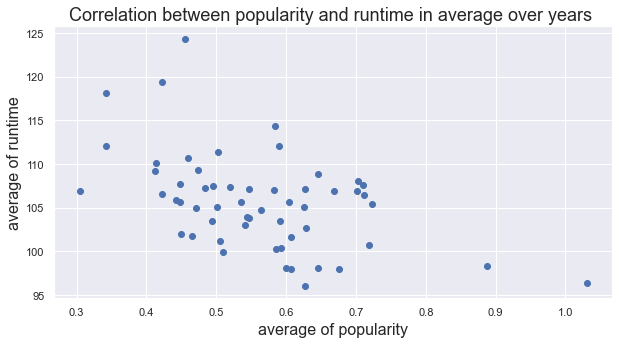

In [45]:
#average of popularity over years
mean_popularity=df.groupby('release_year')['popularity'].mean()

#average of runtime over years
mean_runtime=df.groupby('release_year')['runtime'].mean()

#find the correlation using 'corrcoef()' function.
print('The correlation between popularity and runtime= \n',np.corrcoef(mean_popularity,mean_runtime))
#Visualization


print('\n           -->>The plot below show the correlation between Popularity and runtime in average overtime<<--')

plt.scatter(x=mean_popularity,y=mean_runtime);
#set the figure size and labels

sns.set(rc={'figure.figsize':(10,5)});
plt.title('Correlation between popularity and runtime in average over years ' ,fontsize = 18);
plt.xlabel('average of popularity',fontsize = 16);
plt.ylabel('average of runtime',fontsize = 16);

### Note: There is moderate relation between Budget and Revenue. 
### ------->  It is a negative relationship. 
### -------> While one increasing the other decreased. 
### -------> That means the more runtime of movie  the less popularity happened.

## Research Question 10 (Is there a relationship between the popularity  of movie and its profit in average over years? )

The correlation between popularity and profit in average over years = 
 [[1.         0.65992121]
 [0.65992121 1.        ]]

           -->>The plot below show the correlation between popularity and profit in average over years<<--


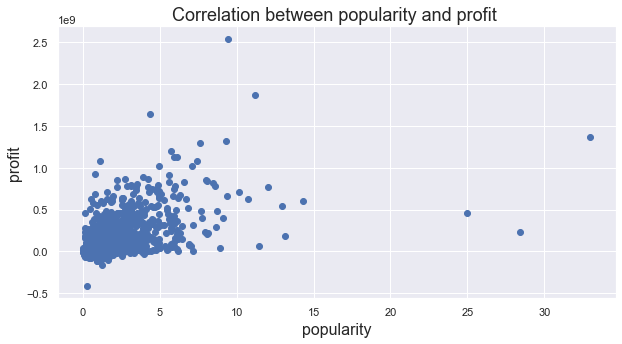

In [46]:
mean_popularity=df.groupby('release_year')['popularity'].mean()
mean_profit=df.groupby('release_year')['profit'].mean()

#find the correlation using 'corrcoef()' function.
print('The correlation between popularity and profit in average over years = \n',np.corrcoef(mean_popularity,mean_profit))

print('\n           -->>The plot below show the correlation between popularity and profit in average over years<<--')

#Visualization

plt.scatter(x=df['popularity'],y=df['profit']);
#set the figure size and labels

sns.set(rc={'figure.figsize':(10,5)});
plt.title('Correlation between popularity and profit ' ,fontsize = 18);
plt.xlabel('popularity',fontsize = 16);
plt.ylabel('profit',fontsize = 16);

##### There is moderate relation between popularity and profit .
##### -------> It is a positive relationship.
##### -------> While one increasing the other increased too.
##### -------> That means the more more popularity  the more profit gained.
##### -------> But also we can  notice there are outliers , 
#####            although the popularity exceed 25 , but has lower profit than some  movies with less popularity,  so I think there are other factors may affect this relation 

<a id='conclusions'></a>
## Conclusions


### Finally we can conclude that :

##### Max_numbers of movies is (700) and it was at year: (2014).
##### Min_numbers of movies is (31) and it was at year: (1961).
##### Number of movies during a year is increasing over years.
**************************************************************************
##### The movie with the highest runtime ( 900 ) is :( The Story of Film: An Odyssey ) 
##### The movie with the lowest runtime ( 2.0 ) is :( Fresh Guacamole )
##### The maximum average runtime of movies is ( 124.34 ) was at the year ( 1962 ) 
##### The minmum average runtime of movies is ( 96.04 ) was at the year ( 2013 ) 
##### The average of runtime of movie decreasing over years
**************************************************************************

##### The movie with the highest profit ( 2544505847.0 ) is :( Avatar ) 
##### The movie with the lowest profit ( -413912431.0 ) is :( The Warrior's Way )
##### The maximum average profit of movies is ( 118950907.96 ) was at the year ( 2015 ) 
##### The minmum average profit of movies is ( 10493737.8 ) was at the year ( 1966 ) 
##### The average of profit of movie increasing over years
**************************************************************************

##### Correlation Between Revenue And Budget =  0.69
##### There is moderate relation between Budget and Revenue.
##### -------> It is a positive relationship.
##### -------> While one increasing the other increased too.
##### -------> That means the more budget spent the more profit gained.

**************************************************************************

##### The correlation between popularity and runtime= -0.49
##### There is moderate relation between Budget and Revenue.
##### -------> It is a negative relationship.
##### -------> While one increasing the other decreased.
##### -------> That means the more runtime of movie the less popularity happened
**************************************************************************
##### The correlation between popularity and profit in average over years =0.66 
##### There is moderate relation between popularity and profit .
##### -------> It is a positive relationship.
##### -------> While one increasing the other increased too.
##### -------> That means the more more popularity  the more profit gained.
##### -------> But also we can  notice there are outliers , 
#####            although the popularity exceed 25 , but has lower profit than some  movies with less popularity,  so I think there are other factors may affect this relation 

## Limitations:
   ##### -------> This above exploration is not guaranteed 100% 
   
   ##### ------->This exploration gives us high expectations and it may affected by other factors that would lead to different results .
   
   ##### ------->During the data cleaning I fill zeros in some columns with NAN to exclude zeros from calculation which can be misleading

Source used in this project: www.stackflow.com